# Imports

In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

randSeed = 78252

# File locations

In [2]:
dataset = 'model/landPoints.csv'
saveModelTo = 'model/landPointClassifier.keras'
tfliteSaveModelTo = 'model/landPointClassifier.tflite'

# Dataset reading

In [3]:
datasetX = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
datasetY = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
trainX, testX, trainY, testY = train_test_split(datasetX, datasetY, train_size=0.8, random_state=randSeed)

# Model building

In [ ]:
classAmount = 29

model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(57, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(classAmount, activation='softmax')
])
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 57)             │         2,451 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 57)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 29)             │           957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,264 (20.56 KB)

 Trainable params: 5,264 (20.56 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Model checkpoint callback
cpCallback = tf.keras.callbacks.ModelCheckpoint(
    saveModelTo, verbose=1, save_weights_only=False)
# Callback for early stopping
esCallback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [6]:
model.fit(
    trainX,
    trainY,
    epochs=1000,
    batch_size=128,
    validation_data=(testX, testY),
    callbacks=[cpCallback, esCallback]
)

Epoch 1/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 9s 527ms/step - accuracy: 0.0234 - loss: 3.3955
Epoch 1: saving model to model/landPointClassifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0421 - loss: 3.3720 - val_accuracy: 0.1741 - val_loss: 3.2510
Epoch 2/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0547 - loss: 3.3065
Epoch 2: saving model to model/landPointClassifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0892 - loss: 3.2677 - val_accuracy: 0.2310 - val_loss: 3.1238
Epoch 3/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1172 - loss: 3.1724
Epoch 3: saving model to model/landPointClassifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1334 - loss: 3.1532 - val_accuracy: 0.2552 - val_loss: 2.9268
Epoch 4/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1406 - loss: 3.0310
Epoch 4: saving model to model/landPointClassifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1726 - loss: 2.9863 - va

In [7]:
# Model evaluation
valLoss, valAcc = model.evaluate(testX, testY, batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9813 - loss: 0.1521 


In [8]:
# Loading the saved model
model = tf.keras.models.load_model(saveModelTo)

In [9]:
# Inference test
resultPredict = model.predict(np.array([testX[0]]))
print(np.squeeze(resultPredict))
print(np.argmax(np.squeeze(resultPredict)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[1.2205789e-02 2.6503064e-10 8.7770692e-05 1.1251028e-06 7.3744426e-04
 9.9267981e-09 1.3787852e-05 1.2194718e-06 5.4991823e-08 2.2648408e-07
 4.7652535e-14 1.1207998e-06 1.7963378e-01 7.9500866e-01 3.4698957e-04
 2.5193463e-05 1.3047105e-09 4.6950058e-04 7.5697536e-03 1.1304853e-03
 1.9001693e-08 3.6710999e-12 1.0257229e-13 2.6229578e-03 6.0178184e-17
 8.9956711e-07 1.4296570e-04 3.6589067e-13 2.2063959e-07]
13


# Confusion matrix

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


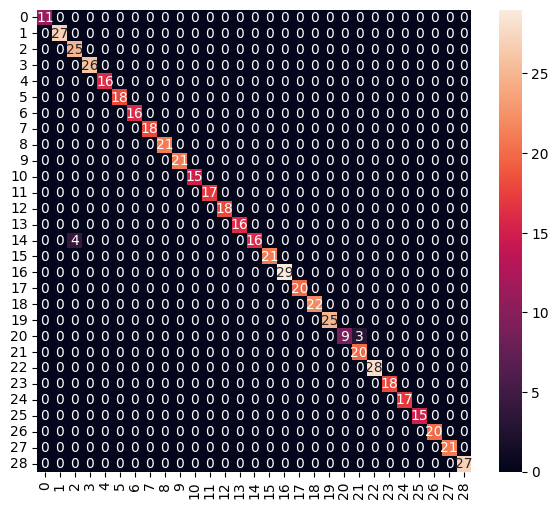

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        27
           2       0.86      1.00      0.93        25
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        16
          14       1.00      0.80      0.89        20
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        29
     

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def printConfMatrix(yTrue, yPred, report=True):
    labels = sorted(list(set(yTrue)))
    cmxData = confusion_matrix(yTrue, yPred, labels=labels)
    
    dfCmx = pd.DataFrame(cmxData, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(dfCmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(yTrue)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(testY, yPred))

Y_pred = model.predict(testX)
yPred = np.argmax(Y_pred, axis=1)

printConfMatrix(testY, yPred)

# Convert to model for Tensorflow-Lite

In [11]:
# Save as a model dedicated to inference
model.save(saveModelTo, include_optimizer=False)

In [12]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tfliteModelQuantized = converter.convert()

open(tfliteSaveModelTo, 'wb').write(tfliteModelQuantized)

INFO:tensorflow:Assets written to: C:\Users\ArdyIra\AppData\Local\Temp\tmp3_xcx0iz\assets


INFO:tensorflow:Assets written to: C:\Users\ArdyIra\AppData\Local\Temp\tmp3_xcx0iz\assets


Saved artifact at 'C:\Users\ArdyIra\AppData\Local\Temp\tmp3_xcx0iz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 29), dtype=tf.float32, name=None)
Captures:
  2293730881456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2293697606960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2293730879168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2293730995616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2293730880224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2293730994384: TensorSpec(shape=(), dtype=tf.resource, name=None)


11624